In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./mem_true/src_mass/df_mass.csv')
df['Time'] = df['Time'] - df['Memory Constraint Time'] + df['Heft Time']

In [3]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter


def draw_bar(xaxis, yaxis, d):
    dd = ['a', 'b', 'c', 'd', 'e']
    # plt.subplot(gs[gid-2])
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d, ci = None)
    plt.xlabel('')
    ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.2), ncol=4, borderaxespad=0, frameon=False)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: 'Task ' + dd[x]))
    values = d[yaxis].groupby([d['gid'], d['Type']]).mean()
    print(values)

def draw_stacked_bar(xaxis, yaxis1, yaxis2, d):
    dd = ['a', 'b', 'c', 'd', 'e']
    # plt.subplot(gs[gid-2])
    ax = sns.barplot(x=xaxis, y=d[yaxis1],
                     hue="Type", data=d, ci = None, palette=sns.color_palette('pastel'))
    ax = sns.barplot(x=xaxis, y=d[yaxis2],
                     hue="Type", data=d, ci = None, palette=sns.color_palette())
    plt.xlabel('')
    ax.legend(['CPF', 'ICRB', 'STO', 'Rand'], loc='lower center', bbox_to_anchor= (0.5,-0.2), ncol=4, borderaxespad=0, frameon=False)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: 'Task ' + dd[x]))
    values1 = d[yaxis1].groupby([d['gid'], d['Type']]).mean()
    values2 = d[yaxis2].groupby([d['gid'], d['Type']]).mean()
    print(values1, values2)
    
def draw_bars(bartype, dir):
    xaxis = 'gid'

    plt.figure(figsize = (25, 10))
    sns.set(font_scale = 2.5)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Calibri'})
    
    if bartype == 'EDER':
        draw_bar(xaxis, 'EDER', df)
        plt.savefig('./'+ dir + 'EDER.pdf', bbox_inches='tight')
    elif bartype == 'DOR':
        draw_bar(xaxis, 'DOR', df)
        plt.savefig('./'+ dir + 'DOR.pdf', bbox_inches='tight')
    elif bartype == 'Time':
        draw_bar(xaxis, 'Time', df)
        plt.savefig('./'+ dir + 'Time.pdf', bbox_inches='tight')
    elif bartype == 'Time_heft':
        draw_stacked_bar(xaxis, 'Time', 'Heft Time', df)
        plt.ylabel('Heft / Containerization Time')
        plt.savefig('./'+ dir + 'Time_heft.pdf', bbox_inches='tight')
    else:
        draw_stacked_bar(xaxis, 'Total Pct.', 'Calculation Pct.', df)
        plt.ylabel('Calculation / Communication Pct.')
        plt.savefig('./'+ dir + 'PCT.pdf', bbox_inches='tight')

gid  Type
2    CPF     0.528041
     ICRB    0.522643
     Rand    0.527549
     STO     0.540222
3    CPF     0.676540
     ICRB    0.666284
     Rand    0.666965
     STO     0.681489
4    CPF     0.402096
     ICRB    0.397808
     Rand    0.403029
     STO     0.411928
Name: Total Pct., dtype: float64 gid  Type
2    CPF     0.252033
     ICRB    0.251834
     Rand    0.234995
     STO     0.243217
3    CPF     0.378520
     ICRB    0.384464
     Rand    0.347635
     STO     0.359003
4    CPF     0.229751
     ICRB    0.233549
     Rand    0.215236
     STO     0.225118
Name: Calculation Pct., dtype: float64


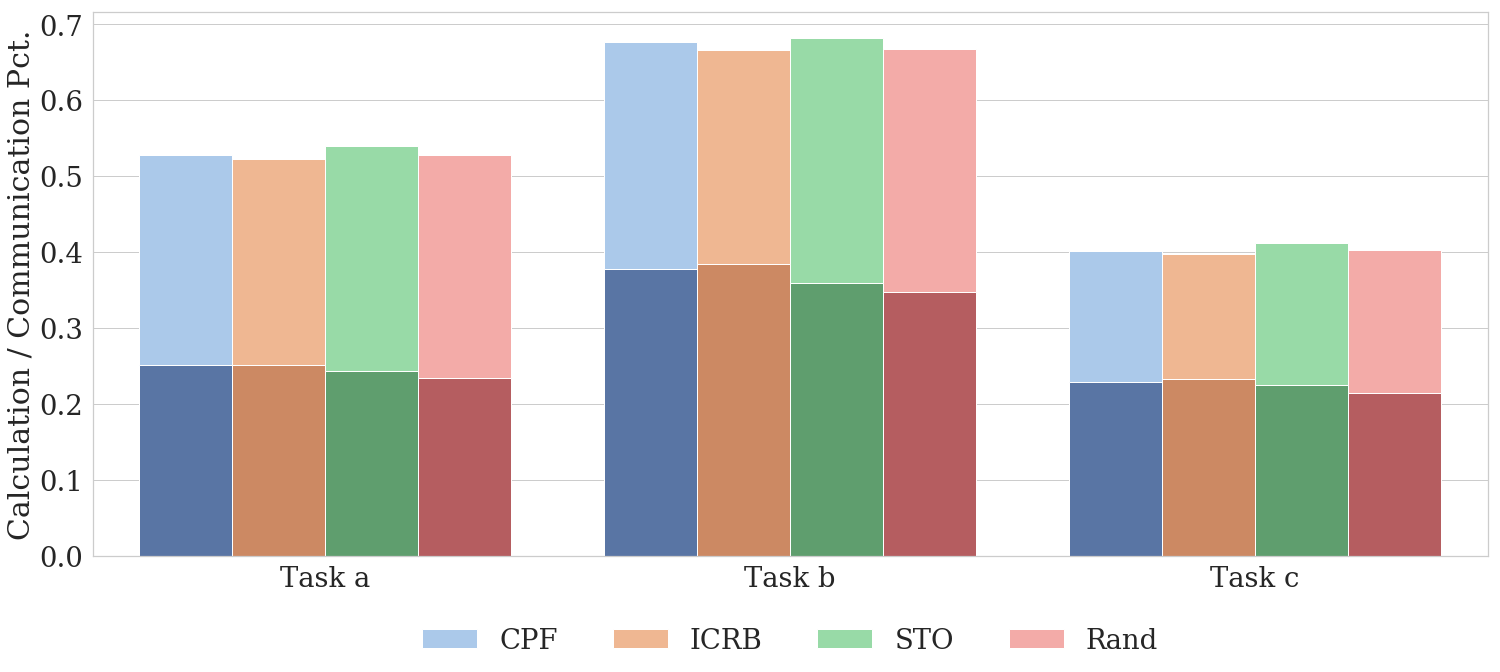

In [4]:
draw_bars('PCT', 'mem_true/src_mass/')

gid  Type
2    CPF     0.738194
     ICRB    0.740488
     Rand    0.893498
     STO     0.815626
3    CPF     0.711906
     ICRB    0.674090
     Rand    0.934803
     STO     0.844800
4    CPF     0.681308
     ICRB    0.637754
     Rand    0.847181
     STO     0.728882
Name: EDER, dtype: float64


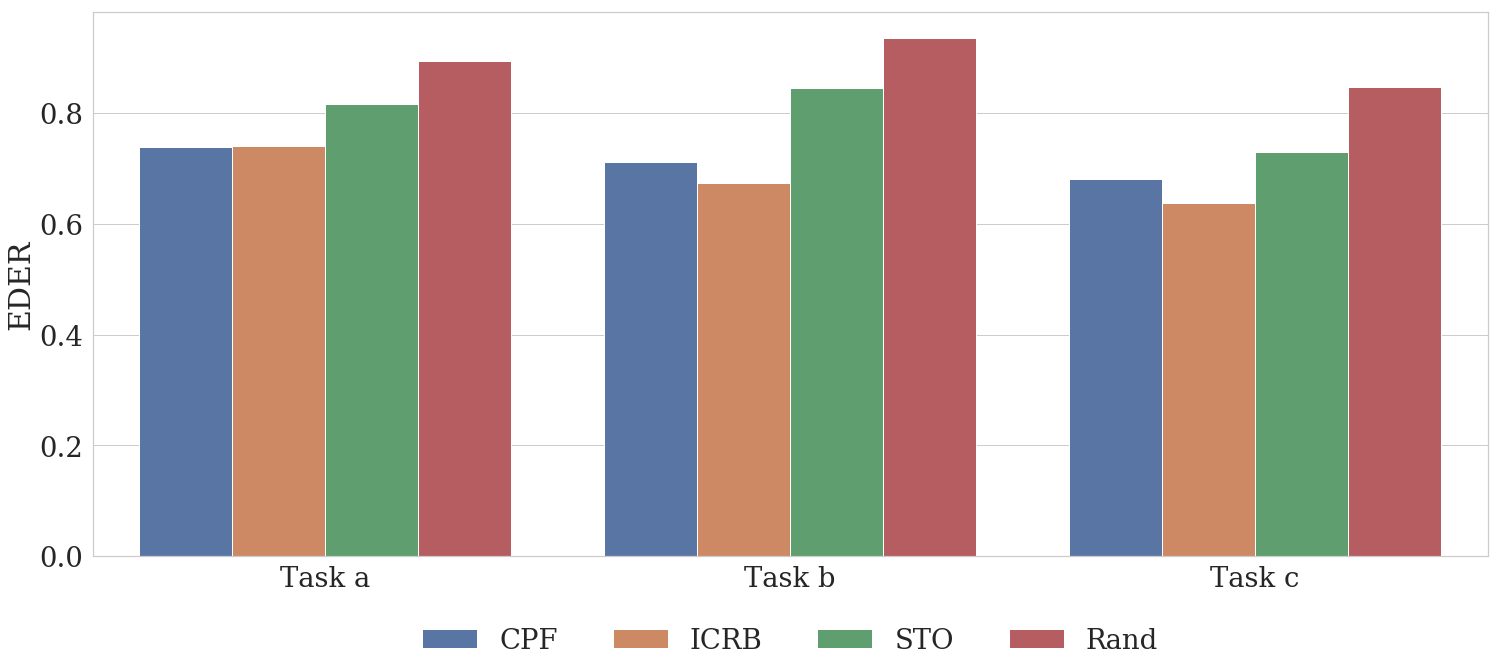

In [5]:
draw_bars('EDER', 'mem_true/src_mass/')

gid  Type
2    CPF     0.505083
     ICRB    0.485274
     Rand    0.730885
     STO     0.143945
3    CPF     0.401663
     ICRB    0.433399
     Rand    0.791687
     STO     0.118920
4    CPF     0.483877
     ICRB    0.566360
     Rand    0.739079
     STO     0.165683
Name: DOR, dtype: float64


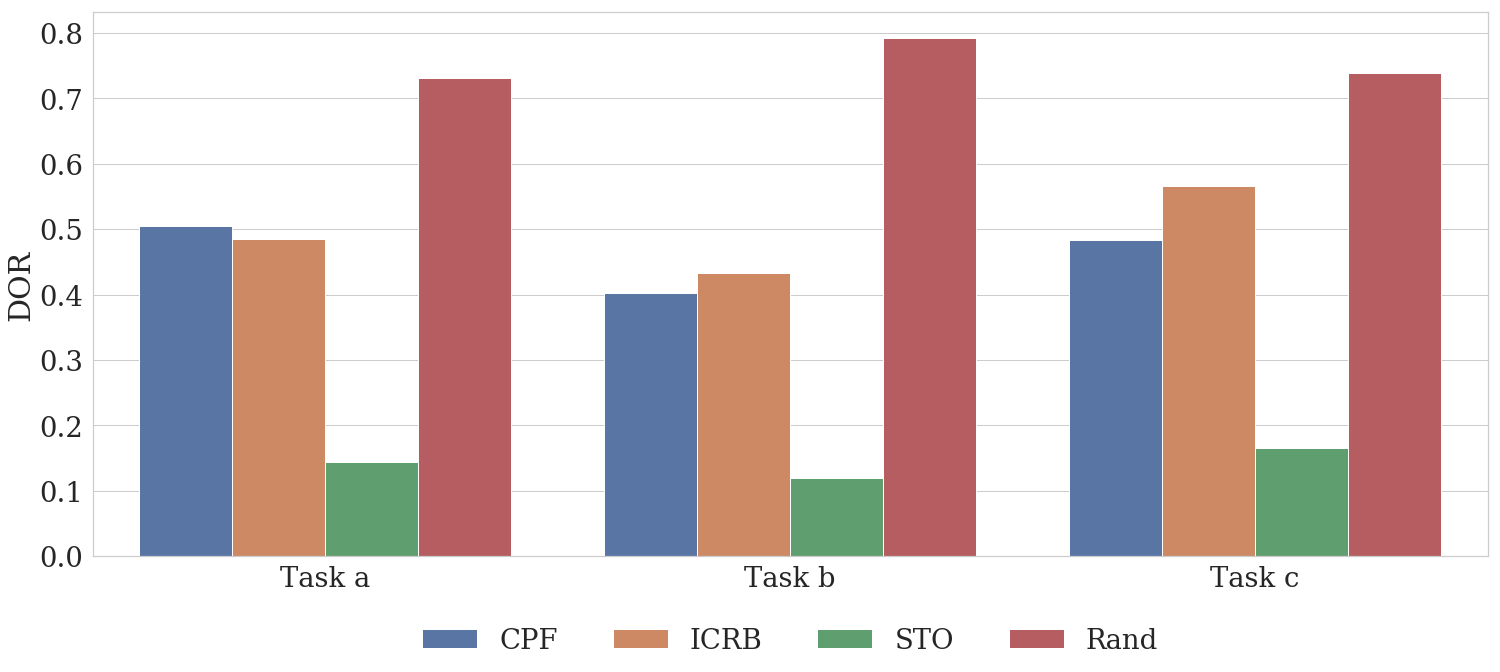

In [6]:
draw_bars('DOR', 'mem_true/src_mass/')

gid  Type
1    CPF     0.005770
     ICRB    0.005600
     Rand    0.005477
     STO     0.005429
2    CPF     0.022342
     ICRB    0.022034
     Rand    0.021791
     STO     0.021708
3    CPF     0.075159
     ICRB    0.073972
     Rand    0.072963
     STO     0.073076
4    CPF     0.012591
     ICRB    0.012329
     Rand    0.012157
     STO     0.012089
Name: Time, dtype: float64
gid  Type
1    CPF     0.005770
     ICRB    0.005600
     Rand    0.005477
     STO     0.005429
2    CPF     0.022342
     ICRB    0.022034
     Rand    0.021791
     STO     0.021708
3    CPF     0.075159
     ICRB    0.073972
     Rand    0.072963
     STO     0.073076
4    CPF     0.012591
     ICRB    0.012329
     Rand    0.012157
     STO     0.012089
Name: Time, dtype: float64


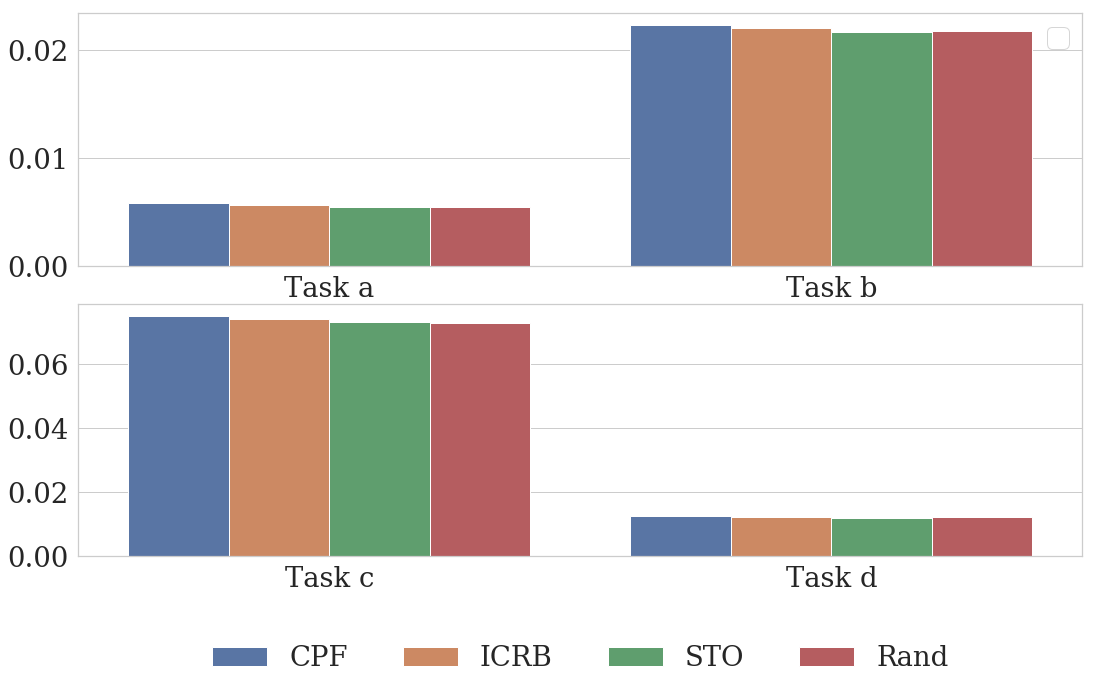

In [7]:
def draw_time(d):
    xaxis = 'gid'
    yaxis = 'Time'
    gs = gridspec.GridSpec(2, 1)
    gs.update(wspace=0.025, hspace=0.15)
    plt.figure(figsize = (18, 10))
    sns.set(font_scale = 2.5)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Calibri'})
    dd = ['a', 'b', 'c', 'd', 'e']
    plt.subplot(gs[0])
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d.gid <= 2], ci = None)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: 'Task ' + dd[x]))
    ax.legend('')
    plt.xlabel('')
    plt.ylabel('')
    
    values = d[yaxis].groupby([d['gid'], d['Type']]).mean()
    print(values)
    
    # lower parts
    
    plt.subplot(gs[1])
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d.gid > 2], ci = None)
    plt.xlabel('')
    plt.ylabel('')
    ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.5), ncol=4, borderaxespad=0, frameon=False)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: 'Task ' + dd[x+2]))
    values = d[yaxis].groupby([d['gid'], d['Type']]).mean()
    print(values)
    
df = pd.read_csv('./mem_true/src_mass/df_mass.csv')
df['Time'] = df['Time'] - df['Memory Constraint Time'] + df['Heft Time']
df_ = pd.read_csv('./mem_true/src1/df.csv')
df = df.append(df_, sort=False)
df = df[(df.Type != 'SFE') & (df.Type != 'SFD')]
draw_time(df)
plt.savefig('./mem_true/src_mass/Time.pdf', bbox_inches='tight')

gid  Type
1    CPF     0.005770
     ICRB    0.005600
     Rand    0.005477
     STO     0.005429
2    CPF     0.022342
     ICRB    0.022034
     Rand    0.021791
     STO     0.021708
3    CPF     0.075159
     ICRB    0.073972
     Rand    0.072963
     STO     0.073076
4    CPF     0.012591
     ICRB    0.012329
     Rand    0.012157
     STO     0.012089
Name: Time, dtype: float64
gid  Type
1    CPF     0.003636
     ICRB    0.003636
     Rand    0.003636
     STO     0.003636
2    CPF     0.018250
     ICRB    0.018250
     Rand    0.018250
     STO     0.018250
3    CPF     0.067154
     ICRB    0.067154
     Rand    0.067154
     STO     0.067154
4    CPF     0.009400
     ICRB    0.009400
     Rand    0.009400
     STO     0.009400
Name: Heft Time, dtype: float64
gid  Type
1    CPF     0.005770
     ICRB    0.005600
     Rand    0.005477
     STO     0.005429
2    CPF     0.022342
     ICRB    0.022034
     Rand    0.021791
     STO     0.021708
3    CPF     0.075159
     ICRB

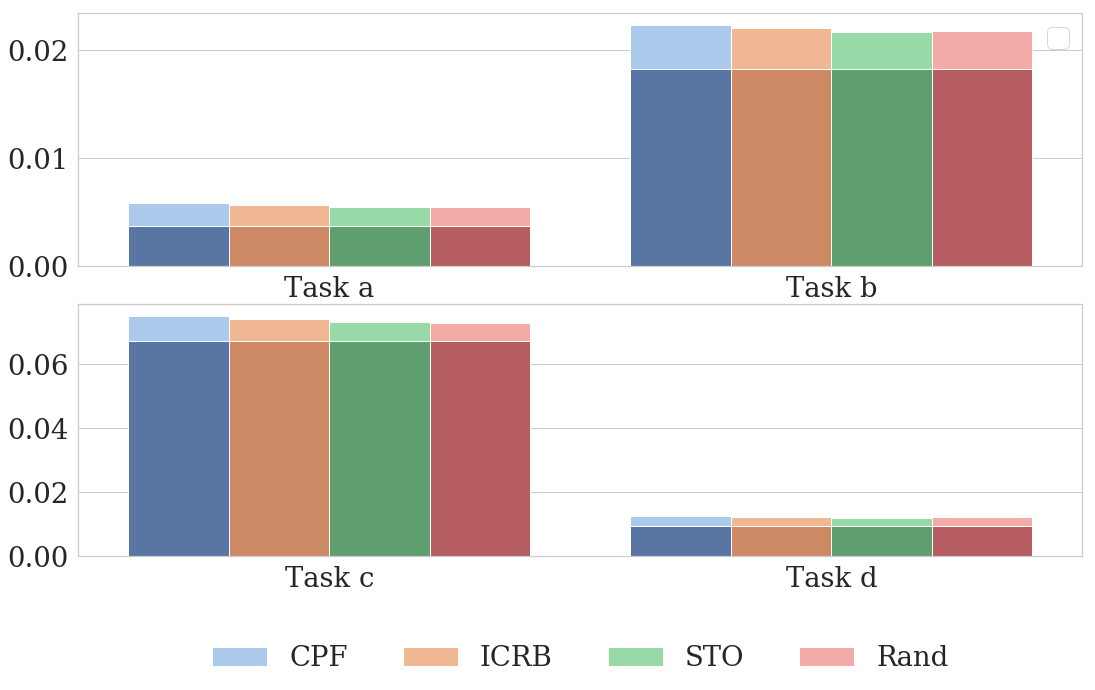

In [8]:
def draw_time_heft(d):
    xaxis = 'gid'
    yaxis1 = 'Time'
    yaxis2 = 'Heft Time'
    gs = gridspec.GridSpec(2, 1)
    gs.update(wspace=0.025, hspace=0.15)
    plt.figure(figsize = (18, 10))
    sns.set(font_scale = 2.5)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Calibri'})
    dd = ['a', 'b', 'c', 'd', 'e']
    plt.subplot(gs[0])
    ax = sns.barplot(x=xaxis, y=yaxis1, hue="Type", data=d[d.gid <= 2], ci = None, palette=sns.color_palette('pastel'))
    values = d[yaxis1].groupby([d['gid'], d['Type']]).mean()
    print(values)
    ax = sns.barplot(x=xaxis, y=yaxis2, hue="Type", data=d[d.gid <= 2], ci = None, palette=sns.color_palette())
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: 'Task ' + dd[x]))
    values = d[yaxis2].groupby([d['gid'], d['Type']]).mean()
    print(values)
    ax.legend('')
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(gs[1])
    ax = sns.barplot(x=xaxis, y=yaxis1, hue="Type", data=d[d.gid > 2], ci = None, palette=sns.color_palette('pastel'))
    values = d[yaxis1].groupby([d['gid'], d['Type']]).mean()
    print(values)
    ax = sns.barplot(x=xaxis, y=yaxis2, hue="Type", data=d[d.gid > 2], ci = None, palette=sns.color_palette())
    values = d[yaxis2].groupby([d['gid'], d['Type']]).mean()
    print(values)
    ax.legend(['CPF', 'ICRB', 'STO', 'Rand'], loc='lower center', bbox_to_anchor= (0.5,-0.5), ncol=4, borderaxespad=0, frameon=False)
    plt.xlabel('')
    plt.ylabel('')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: 'Task ' + dd[x+2]))

draw_time_heft(df)
plt.savefig('./mem_true/src_mass/Time_heft.pdf', bbox_inches='tight')

In [9]:
def draw_six_bars(gid, xaxis, yaxis, d, dir):
    plt.figure(figsize = (25, 4))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Calibri'})
    dd = ['', 'a', 'b', 'c', 'd', 'e']
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d['gid'] == gid], ci = None)
    values = d[yaxis].groupby([d['Case'], d['Type']]).mean()
    print(values)
    plt.ylabel('Task ' + dd[gid])
    ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.6), ncol=6, borderaxespad=0, frameon=False)
    plt.savefig('./' + dir + 'search_{}.pdf'.format(yaxis), bbox_inches = 'tight')

Case  Type
0     CPF     0.591473
      ICRB    0.520240
      Rand    0.796203
      SFD     0.677475
      SFE     0.376007
      STO     0.733705
1     CPF     0.609517
      ICRB    0.551172
      Rand    0.791738
      SFD     0.660625
      SFE     0.377774
      STO     0.733740
2     CPF     0.615493
      ICRB    0.549608
      Rand    0.795713
      SFD     0.655532
      SFE     0.375247
      STO     0.728168
3     CPF     0.618813
      ICRB    0.544087
      Rand    0.791135
      SFD     0.659925
      SFE     0.379817
      STO     0.733281
4     CPF     0.624169
      ICRB    0.547557
      Rand    0.795339
      SFD     0.664277
      SFE     0.375656
      STO     0.730952
                ...   
9     CPF     0.654798
      ICRB    0.516819
      Rand    0.793963
      SFD     0.730648
      SFE     0.421014
      STO     0.753123
10    CPF     0.693596
      ICRB    0.627709
      Rand    0.875359
      SFD     0.793448
      SFE     0.408679
      STO     0.879117


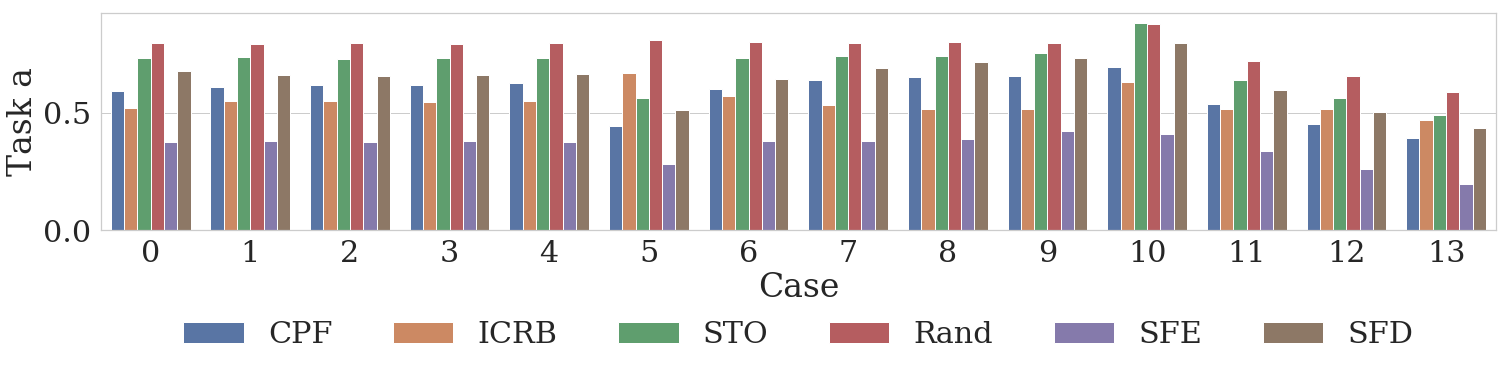

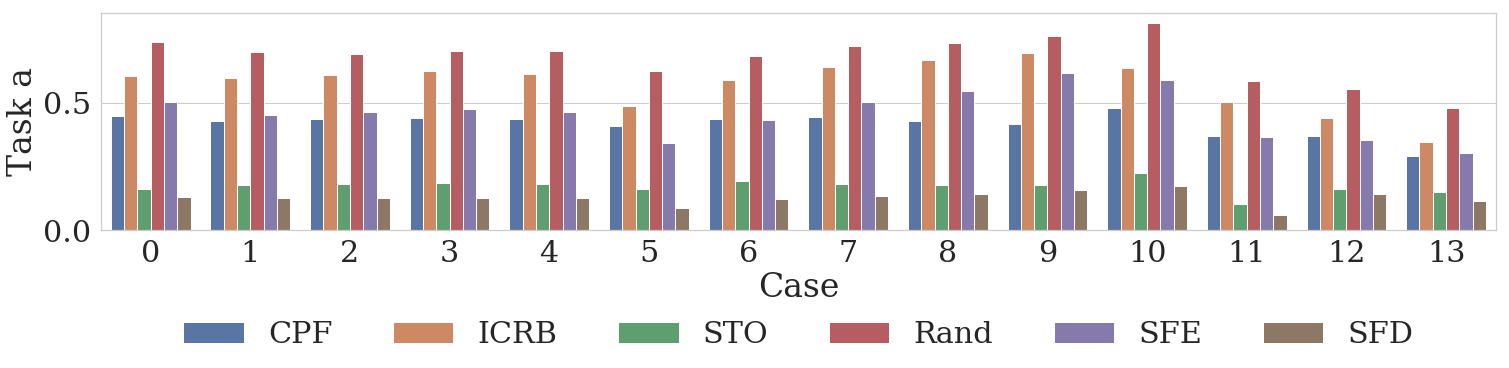

In [10]:
df = pd.read_csv('./mem_true/src1/df.csv')
draw_six_bars(1, 'Case', 'EDER', df, 'mem_true/src1/')
draw_six_bars(1, 'Case', 'DOR',  df, 'mem_true/src1/')

Case  Type
0     CPF     0.497667
      ICRB    0.514787
      Rand    0.796345
      SFD     0.601606
      SFE     0.347085
      STO     0.702485
1     CPF     0.434490
      ICRB    0.635791
      Rand    0.787427
      SFD     0.505006
      SFE     0.283317
      STO     0.552062
2     CPF     0.433909
      ICRB    0.672611
      Rand    0.791834
      SFD     0.507681
      SFE     0.277861
      STO     0.559544
3     CPF     0.427441
      ICRB    0.667424
      Rand    0.797374
      SFD     0.514358
      SFE     0.275941
      STO     0.556524
4     CPF     0.426734
      ICRB    0.668347
      Rand    0.812111
      SFD     0.512858
      SFE     0.279276
      STO     0.561682
5     CPF     0.642624
      ICRB    0.739962
      Rand    0.877120
      SFD     0.722918
      SFE     0.358849
      STO     0.779786
6     CPF     0.334626
      ICRB    0.582101
      Rand    0.733520
      SFD     0.496385
      SFE     0.237783
      STO     0.550899
7     CPF     0.266784


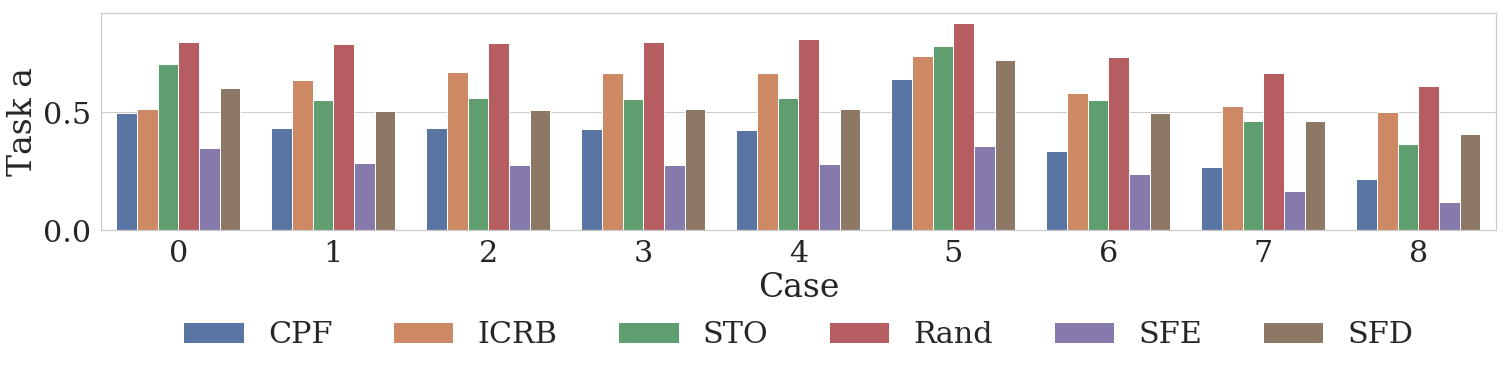

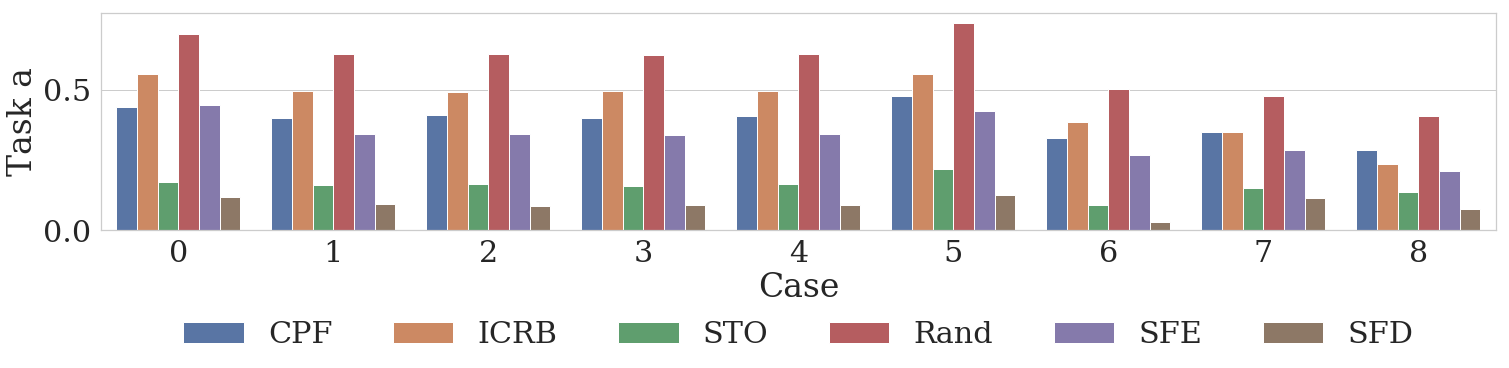

In [11]:
df = pd.read_csv('./mem_false/src1/df.csv')
draw_six_bars(1, 'Case', 'EDER', df, 'mem_false/src1/')
draw_six_bars(1, 'Case', 'DOR',  df, 'mem_false/src1/')

gid  Type
1    CPF     0.380681
     ICRB    0.380298
     Rand    0.378042
     STO     0.378158
2    CPF     0.575429
     ICRB    0.569660
     Rand    0.572870
     STO     0.591918
3    CPF     0.740229
     ICRB    0.727991
     Rand    0.726691
     STO     0.742600
4    CPF     0.470572
     ICRB    0.452547
     Rand    0.465773
     STO     0.480373
5    CPF     0.380826
     ICRB    0.380104
     Rand    0.377624
     STO     0.378666
Name: Total Pct., dtype: float64 gid  Type
1    CPF     0.270535
     ICRB    0.264053
     Rand    0.255676
     STO     0.262289
2    CPF     0.273634
     ICRB    0.276717
     Rand    0.256125
     STO     0.267005
3    CPF     0.415584
     ICRB    0.421944
     Rand    0.378783
     STO     0.390352
4    CPF     0.270856
     ICRB    0.264874
     Rand    0.249182
     STO     0.261500
5    CPF     0.266602
     ICRB    0.263949
     Rand    0.253398
     STO     0.259069
Name: Calculation Pct., dtype: float64


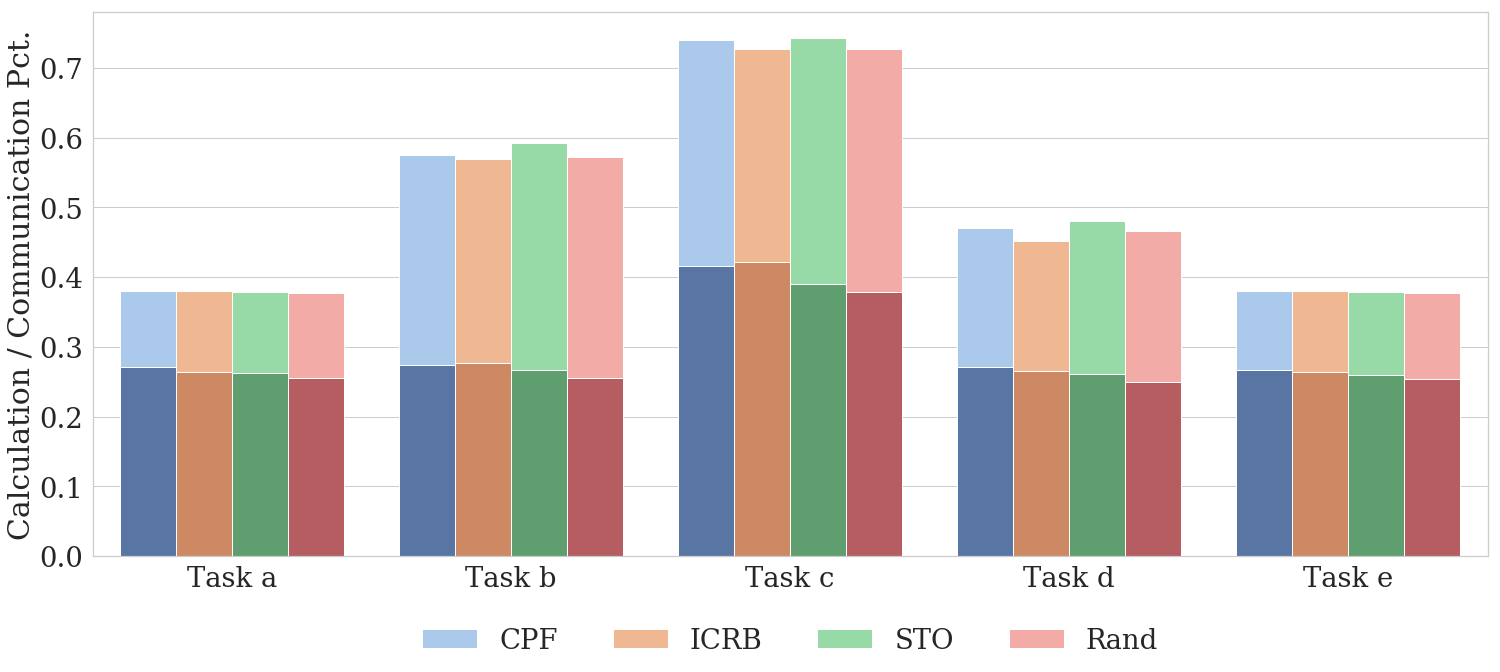

In [12]:
df = pd.read_csv('./mem_false/src_mass/df_mass.csv')

draw_bars('PCT', 'mem_false/src_mass/')

gid  Type
1    CPF     0.455113
     ICRB    0.577078
     Rand    0.734923
     STO     0.598589
2    CPF     0.746124
     ICRB    0.721539
     Rand    0.890402
     STO     0.795118
3    CPF     0.692105
     ICRB    0.655984
     Rand    0.932304
     STO     0.849038
4    CPF     0.634034
     ICRB    0.693432
     Rand    0.839355
     STO     0.715462
5    CPF     0.525923
     ICRB    0.581774
     Rand    0.779518
     STO     0.661460
Name: EDER, dtype: float64


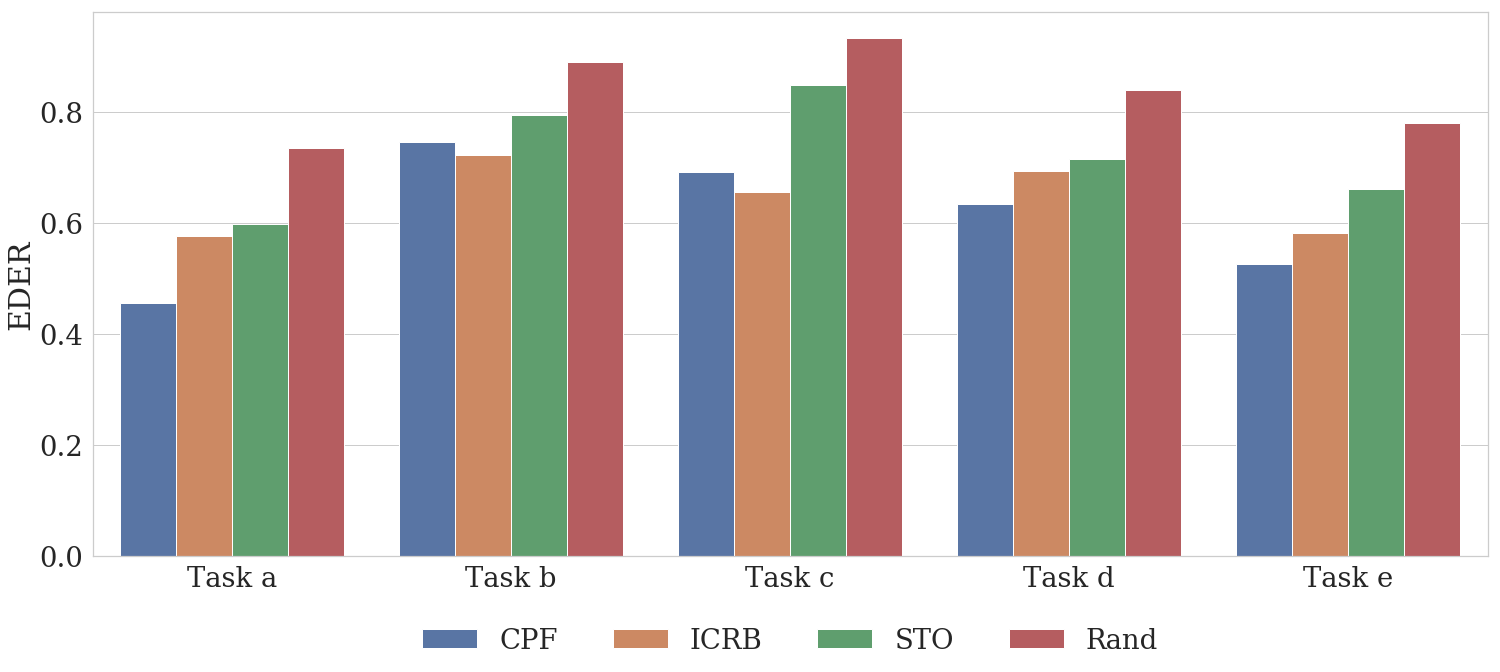

In [13]:
draw_bars('EDER', 'mem_false/src_mass/')

gid  Type
1    CPF     0.360698
     ICRB    0.368839
     Rand    0.600417
     STO     0.126653
2    CPF     0.468897
     ICRB    0.447460
     Rand    0.691046
     STO     0.130057
3    CPF     0.360925
     ICRB    0.410758
     Rand    0.771835
     STO     0.125532
4    CPF     0.438377
     ICRB    0.503797
     Rand    0.678713
     STO     0.159803
5    CPF     0.411497
     ICRB    0.426274
     Rand    0.672858
     STO     0.185295
Name: DOR, dtype: float64


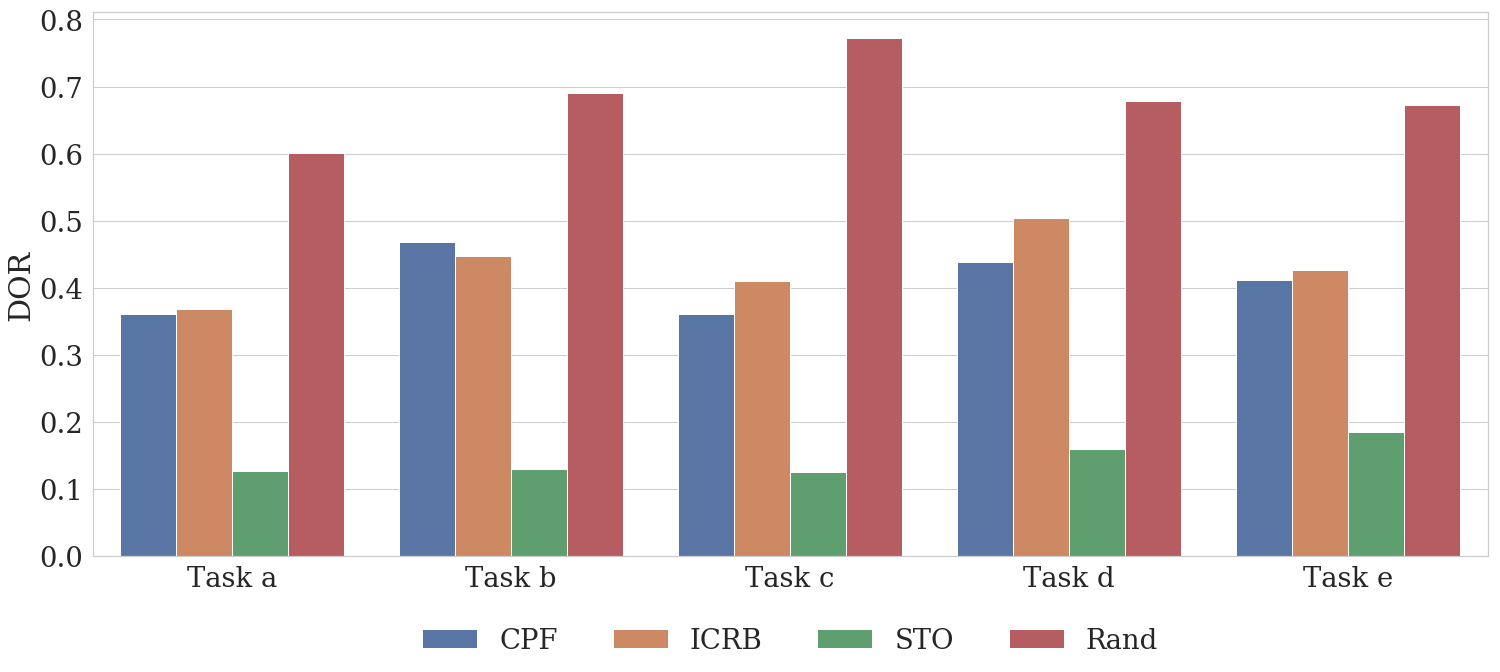

In [14]:
draw_bars('DOR', 'mem_false/src_mass/')

gid  Type
1    CPF     0.004937
     ICRB    0.004771
     Rand    0.004646
     STO     0.004603
2    CPF     0.021289
     ICRB    0.020898
     Rand    0.020569
     STO     0.020460
3    CPF     0.029935
     ICRB    0.029342
     Rand    0.028940
     STO     0.028798
4    CPF     0.010140
     ICRB    0.009892
     Rand    0.009693
     STO     0.009628
5    CPF     0.004471
     ICRB    0.004322
     Rand    0.004201
     STO     0.004167
Name: Time, dtype: float64
gid  Type
1    CPF     0.004937
     ICRB    0.004771
     Rand    0.004646
     STO     0.004603
2    CPF     0.021289
     ICRB    0.020898
     Rand    0.020569
     STO     0.020460
3    CPF     0.029935
     ICRB    0.029342
     Rand    0.028940
     STO     0.028798
4    CPF     0.010140
     ICRB    0.009892
     Rand    0.009693
     STO     0.009628
5    CPF     0.004471
     ICRB    0.004322
     Rand    0.004201
     STO     0.004167
Name: Time, dtype: float64
gid  Type
1    CPF     0.004937
     ICRB    0

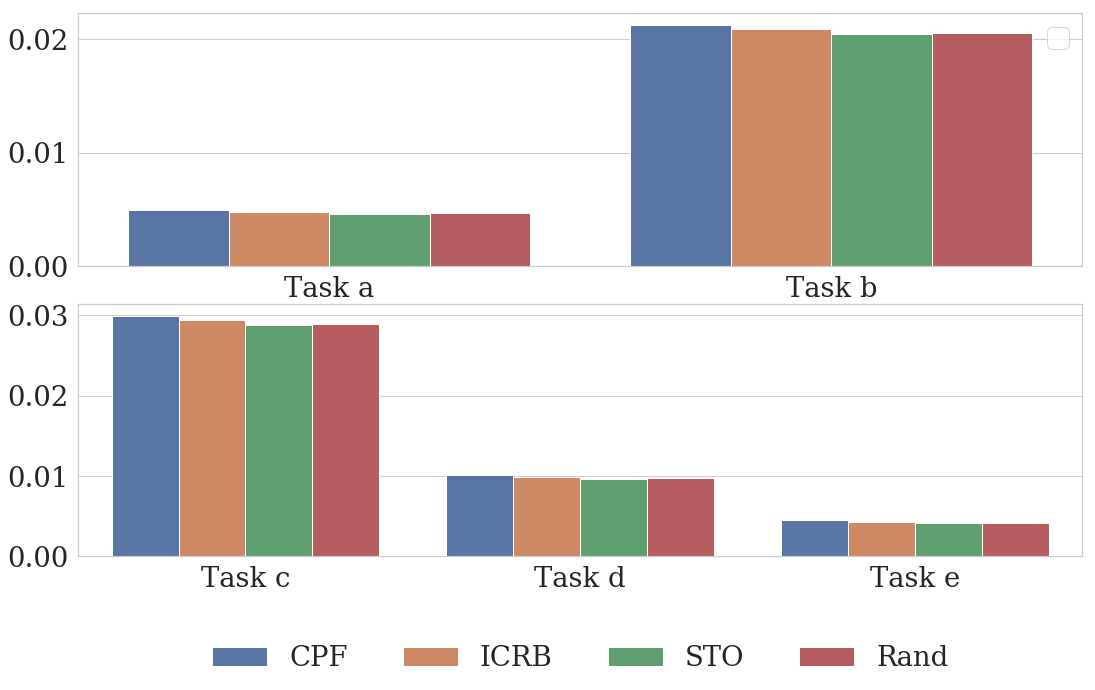

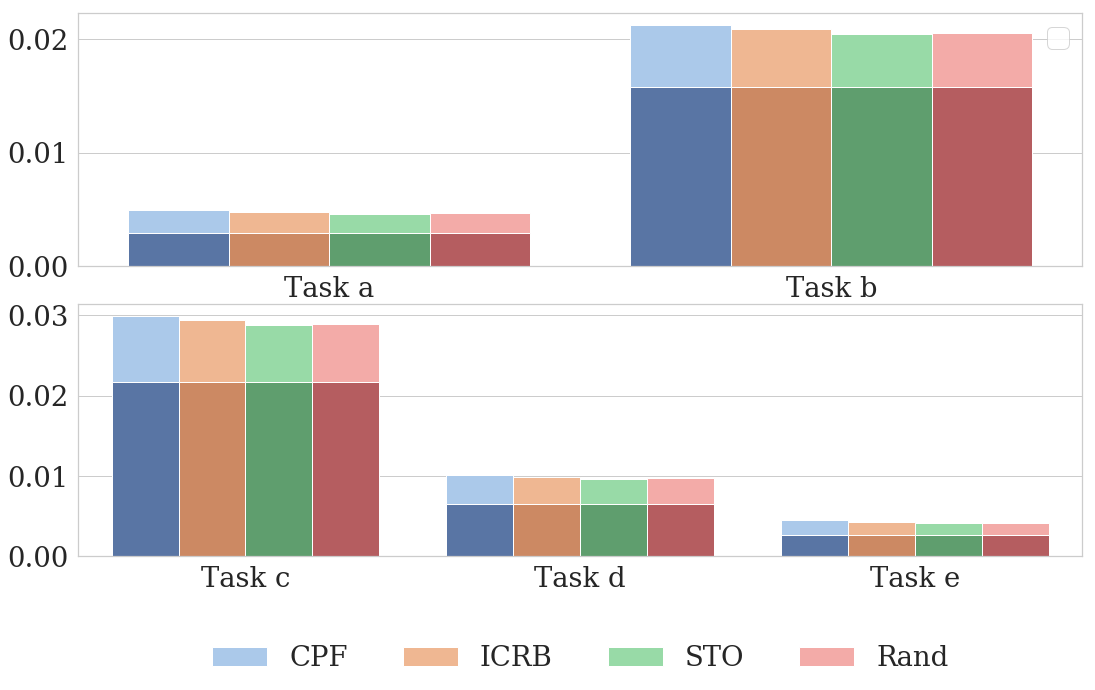

In [15]:
df = pd.read_csv('./mem_false/src_mass/df_mass.csv')
df_ = pd.read_csv('./mem_false/src1/df.csv')
df = df.append(df_, sort=False)
df = df[(df.Type != 'SFE') & (df.Type != 'SFD')]
draw_time(df)
plt.savefig('./mem_false/src_mass/Time.pdf', bbox_inches='tight')

draw_time_heft(df)
plt.savefig('./mem_false/src_mass/Time_heft.pdf', bbox_inches='tight')

In [16]:
def draw_maxcut_core_bar(d):
    plt.figure(figsize = (24, 6))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    dd = ['', 'a', 'b', 'c', 'd', 'e']
    ax = sns.barplot(x='gid', y='Maximum memory', hue="core", data=d, ci = None)
    values = d['Maximum memory'].groupby([d['gid'], d['core']]).mean()
    print(values)
    plt.xticks(range(4), ('Task a', 'Task b', 'Task c', 'Task d'))
    plt.xlabel('')
    ax.legend(['1 core','2 cores','3 cores','4 cores','5 cores','6 cores'], loc='lower center', bbox_to_anchor= (0.5,-0.25), ncol=6, borderaxespad=0, frameon=False)
    plt.savefig('./mem/mem_core.pdf', bbox_inches='tight')

gid  core
1.0  1.0     0.886306
     2.0     0.971840
     3.0     1.000000
     4.0     1.000000
     5.0     1.000000
     6.0     1.000000
2.0  1.0     0.821365
     2.0     0.896238
     3.0     0.950542
     4.0     0.982787
     5.0     0.996882
     6.0     1.000000
3.0  1.0     0.846358
     2.0     0.923160
     3.0     0.967995
     4.0     0.986606
     5.0     0.995365
     6.0     1.000000
4.0  1.0     0.930190
     2.0     0.971516
     3.0     0.990389
     4.0     0.998737
     5.0     1.000000
     6.0     1.000000
Name: Maximum memory, dtype: float64


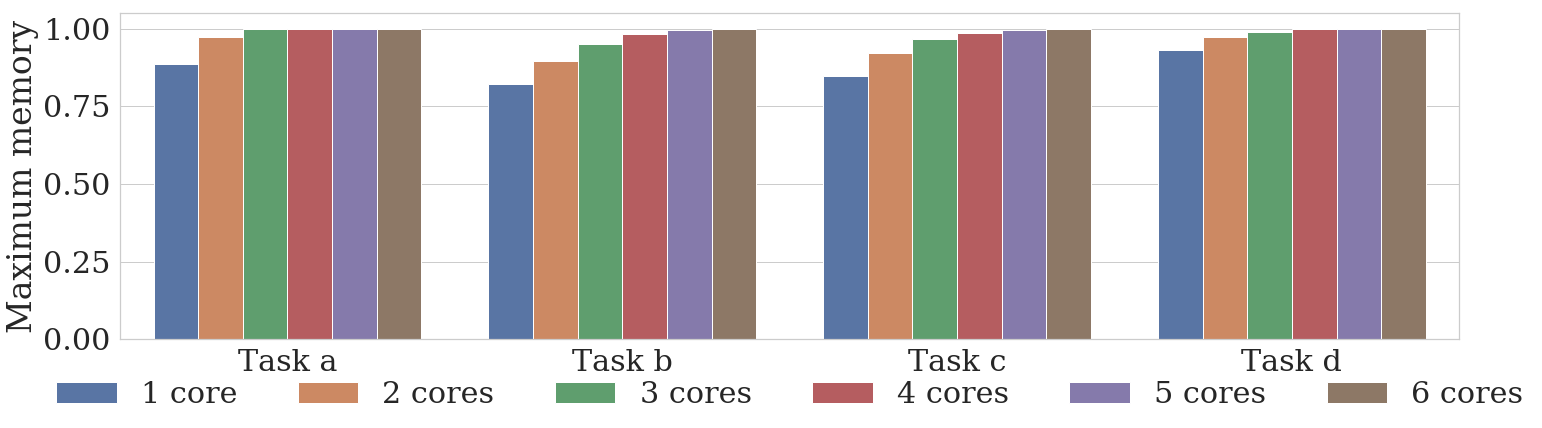

In [17]:
df_mem = pd.read_csv('./mem/df_mem.csv')
draw_maxcut_core_bar(df_mem)

In [19]:
df = pd.read_csv('./mem_false/cmp/df_mass_cmp.csv')
plt.figure(figsize = (25, 10))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Calibri'})
def draw_sched_cmp(gid, xaxis, yaxis, d):
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Scheduling Algorithm", data=d[d['gid'] == gid], ci = None)
    plt.ylabel(yaxis)
    plt.xlabel('')
    ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.3), ncol=4, borderaxespad=0, frameon=False)
    values = d['EDER'].groupby([d['Type'], d['Scheduling Algorithm']]).mean()
    print(values)

<Figure size 1800x720 with 0 Axes>

Type  Scheduling Algorithm
CPF   CPOP                    0.535682
      HEFT                    0.542567
ICRB  CPOP                    0.659633
      HEFT                    0.676099
Rand  CPOP                    0.768730
      HEFT                    0.765774
STO   CPOP                    0.671351
      HEFT                    0.663489
Name: EDER, dtype: float64


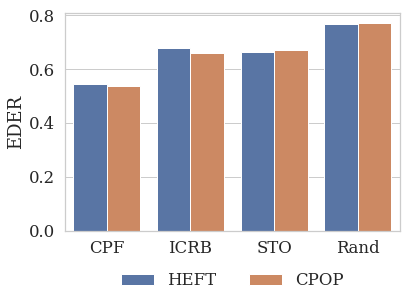

In [20]:
draw_sched_cmp(1,'Type','EDER',df)

Type  Scheduling Algorithm
CPF   CPOP                    0.535682
      HEFT                    0.542567
ICRB  CPOP                    0.659633
      HEFT                    0.676099
Rand  CPOP                    0.768730
      HEFT                    0.765774
STO   CPOP                    0.671351
      HEFT                    0.663489
Name: EDER, dtype: float64


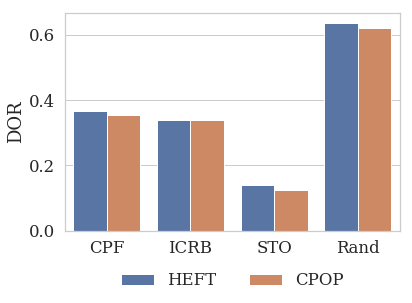

In [21]:
draw_sched_cmp(1,'Type','DOR',df)